<a href="https://colab.research.google.com/github/nochwysid/CSE5008-SP/blob/main/4_SciProg_plt_and_linalg_info.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CME 193 - Lecture 4


Today, we'll cover some more features of numpy.

- Random numbers and histograms
- Power method walkthrough
- Linear algebra functions


# Random numbers

We'll start with 
```python
import numpy as np
import numpy.random as rng
```
`numpy` is the *package*.  `random` is a *module* in the package.

In [ ]:
import numpy as np
import numpy.random as rng

You can find a full list of functions in [the documentation](https://docs.scipy.org/doc/numpy-1.14.0/reference/routines.random.html)

* `rng.rand(d0,d1,...,dn)`, Random values in a given shape
* `rng.randn(d0, d1, ...,dn)`, Random standard normal
* `rng.randint(lo, hi, size)`, Random integers `[lo, hi)`
* `rng.choice(a, size, repl, p)`, Sample from a
* `rng.shuffle(a)`, Permutation (in-place)
* `rng.permutation(a)`, Permutation (new array)
* Also, have parameterized distributions: `beta`, `binomial`, `chisquare`, `exponential`, `dirichlet`, `gamma`, `laplace`, `lognormal`, `pareto`, `poisson`, `power`...

In [ ]:
rng.randint(-10,10,20)

array([  6,   1,  -7,   5,   2,   9,  -3,   0,   7,   5,  -4,   4, -10,
        -3,  -4,   3,  -9,   7,  -8,  -2])

In [ ]:
rng.choice?

### Histograms

In [ ]:
rng.normal?

In [ ]:
x1 = rng.normal(2,3,1000)
x2 = rng.normal(1,5,1000)

In [ ]:
import matplotlib.pyplot as plt

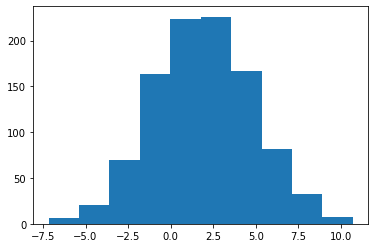

In [ ]:
plt.hist(x1);

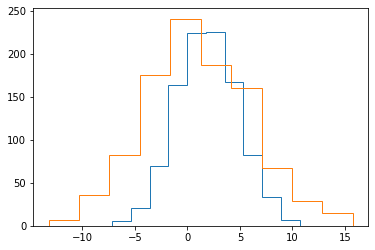

In [ ]:
b = plt.hist(x1,histtype='step')
a = plt.hist(x2,histtype='step')

In [ ]:
plt.hist?

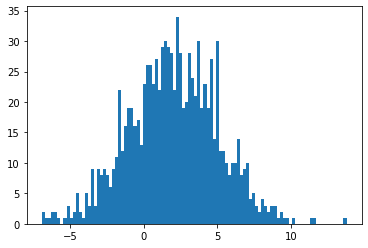

In [ ]:
x1 = rng.normal(2,3,1000)
plt.hist(x1,bins=100);

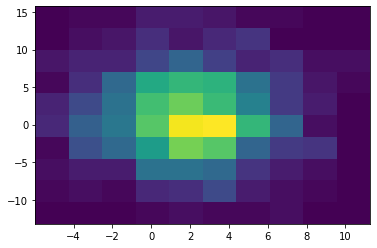

In [ ]:
x1 = rng.normal(2,3,1000)
plt.hist2d(x1,x2);

# Linear Algebra in NumPy

In [ ]:
import numpy.linalg as la

See [the documentation](https://docs.scipy.org/doc/numpy-1.15.1/reference/routines.linalg.html) for more.

* `la.eye(3)`, Identity matrix
* `la.trace(A)`, Trace
* `la.column_stack((A,B))`, Stack column wise
* `la.row_stack((A,B,A))`, Stack row wise
* `la.qr`, Computes the QR decomposition
* `la.cholesky`, Computes the Cholesky decomposition
* `la.inv(A)`, Inverse
* `la.solve(A,b)`, Solves $Ax = b$ for $A$ full rank
* `la.lstsq(A,b)`, Solves $\arg\min_x \|Ax-b\|_2$
* `la.eig(A)`, Eigenvalue decomposition
* `la.eigh(A)`, Eigenvalue decomposition for
symmetric or hermitian
* `la.eigvals(A)`, Computes eigenvalues.
* `la.svd(A, full)`, Singular value decomposition
* `la.pinv(A)`, Computes pseudo-inverse of A

In [ ]:
la.svd?

In [ ]:
# example of SVD
A = np.random.normal(0, 1, (3,3))
U, S, V = la.svd(A)
print("A  = \n", A)
print("U = \n", U)
print("S = \n", S)
print("V = \n", V)

A  = 
 [[-0.2907762   0.22767048 -0.83617631]
 [ 0.87180408  0.75427477  1.06459851]
 [ 0.02361395 -0.41009873 -0.26712408]]
U = 
 [[-0.40558665 -0.87371659  0.26854942]
 [ 0.89172106 -0.31366173  0.32626657]
 [-0.20083084  0.37180054  0.90632849]]
S = 
 [1.74169576 0.65897368 0.26506919]
V = 
 [[ 0.51133993  0.38044708  0.77057868]
 [-0.01610976 -0.89226862  0.45121745]
 [ 0.85922753 -0.24313934 -0.45012367]]


In [ ]:
# @ operator is synonim for matmul
U@np.diag(S)@V - A

array([[-2.77555756e-16, -1.94289029e-16, -9.99200722e-16],
       [ 3.33066907e-16,  4.44089210e-16,  6.66133815e-16],
       [-1.52655666e-16,  1.66533454e-16,  5.55111512e-17]])

In [ ]:
A = np.arange(0, 4, 1.0).reshape(2,2)
x = np.array([1.0,2.0])
print(A.shape(),", ",x.shape())
# dot product of A and x transpose
b = A@x 
#x2 <- A \ b
x2 = la.solve(A,b)

print("A = \n",A)
print("x = \n", x)
print("b = \n", b)
print("x2 = \n", x2)

A = 
 [[0. 1.]
 [2. 3.]]
x = 
 [1. 2.]
b = 
 [2. 8.]
x2 = 
 [1. 2.]


# Exercise

Generate a 100 by 10 matrix `A = np.random.randn(100,10)` and a vector `b = np.random.rand(100)`. Implement the [Richardson iteration](https://en.wikipedia.org/wiki/Modified_Richardson_iteration) to solve the least-squares problem `|A*x-b|_2^2`. Some pseudocode for this is below:

```
    input) A: an m x n matrix, b: a m x 1 vector
    outputs) x: n x 1 vector minimizing |A*x-b|_2^2.

    x <- all-zeros vector
    steplength = 0.01 
    while x has not converged:
        residual <- b - A*x
        x <- x + A^T*(steplength*residual)
```

Compare your solution to numpy's built-in `lstsq` function.

In [ ]:
A = np.random.randn(100,10)
b = np.random.rand(100)
x = np.zeros(10)
steplength = 0.01
print(A.shape(),", ",x.shape())
while la.norm(A.T@(b-A@x)) > 0.000001:
    residual = b - A@x
    x = x + A.T@(steplength*residual)

In [ ]:
x

array([-0.06604382,  0.06766679,  0.11556698,  0.09893056, -0.01155487,
        0.01571051, -0.05979973, -0.03177702,  0.05365032,  0.0427565 ])

In [ ]:
la.lstsq(A,b)

/var/folders/gc/zfy2pjf944jdkfwzcppblklw0000gn/T/ipykernel_5637/262163381.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  la.lstsq(A,b)


(array([-0.06604426,  0.06766679,  0.1155669 ,  0.09893048, -0.01155489,
         0.01571068, -0.05979985, -0.03177706,  0.0536502 ,  0.04275623]),
 array([31.96181528]),
 10,
 array([12.47735517, 12.06288397, 11.41109237, 10.74934879,  9.84907215,
         9.62586842,  9.43320619,  9.10500382,  7.86886768,  7.34426925]))

## Power method

Power method is an algorithm for finding the largest eigenpair of a matrix.  We'll assume that we're working with symmetric/hermitian matrices for simplicity.  Recall the largest eigenvector of a matrix $A$ solves the variational problem:
$$\max_{\|v\|_2 = 1} v^T A v$$
The eigenvalue is the value $\lambda = v^T A v$.
* generate a random symmetric matrix (however you like).
* Find the largest eigenpair using the power method
* Compare the answer with what you would get from numpy.linalg.eigh

The power method uses iterated matrix-vector multiplication to find the largest magnitude eigenvalue of $A$.  
```
    input) A: an n x n symmetric matrix
    outputs) l: the eigenvalue with the largest absolute value
             v: the corresponding eigenvector

    v <- random vector of length n
    while l has not converged:
        v <- A v
        v <- v / ||v||_2
        l <- v^T A v
```

turn the above pseudo-code into a python function that implements power method. How does the result compare to `eigh`?

In [ ]:
A = rng.rand(20,20)
A = A + A.T

v = rng.rand(20)
for i in range(200):
    v = A@v
    v = v/la.norm(v)
    l = np.dot(v,A@v)
    
(l,v )

(21.260043159048056,
 array([0.19769742, 0.22752631, 0.22926507, 0.21212916, 0.19969849,
        0.21088753, 0.21463478, 0.23695026, 0.19954452, 0.23743212,
        0.22903527, 0.22623687, 0.20445379, 0.23483892, 0.22560935,
        0.23356192, 0.23425732, 0.23428285, 0.22152333, 0.25288032]))

In [ ]:
w_eigh, v_eigh = la.eigh(A)

w_eigh[-1]
v_eigh[:,-1]

array([0.19769742, 0.22752631, 0.22926507, 0.21212916, 0.19969849,
       0.21088753, 0.21463478, 0.23695026, 0.19954452, 0.23743212,
       0.22903527, 0.22623687, 0.20445379, 0.23483892, 0.22560935,
       0.23356192, 0.23425732, 0.23428285, 0.22152333, 0.25288032])

We now have the groundwork that we will build on in the rest of the class. We'll conclude class with a demonstration of the power of numpy and scipy as a taster for the rest of the class.

## PCA with numpy

[Principal Component Analysis (PCA)](https://en.wikipedia.org/wiki/Principal_component_analysis) is a very common tool in data science to extract the most relevant features of a dataset. We can implement this in numpy very easily via the SVD. (This demo is taken from the numpy documentation [here](https://numpy.org/doc/1.19/user/tutorial-svd.html)).

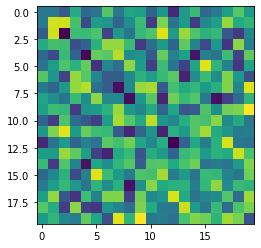

In [ ]:
plt.imshow(A)

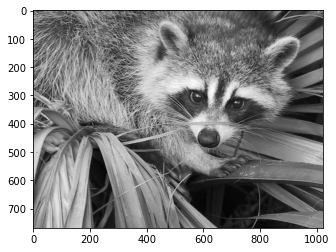

In [ ]:
from scipy import misc

img = misc.face()/255
import matplotlib.pyplot as plt
img_gray = img @ [0.2126, 0.7152, 0.0722]
plt.imshow(img_gray,cmap="gray")

In [ ]:
img_gray

array([[0.45209882, 0.51876549, 0.57815529, ..., 0.47355843, 0.51387529,
        0.54524784],
       [0.33250118, 0.41485412, 0.49104706, ..., 0.46907059, 0.53181569,
        0.57887451],
       [0.26975608, 0.35210902, 0.43446196, ..., 0.47104157, 0.53378667,
        0.57692392],
       ...,
       [0.39135137, 0.40982196, 0.46304078, ..., 0.5706549 , 0.56673333,
        0.5692549 ],
       [0.37452784, 0.41374353, 0.47675608, ..., 0.56840078, 0.56419608,
        0.56419608],
       [0.37509412, 0.42158667, 0.47340078, ..., 0.56447922, 0.56027451,
        0.55635294]])

Consider the image above (actually a numpy array). We will attempt to 'compress' it via the SVD.

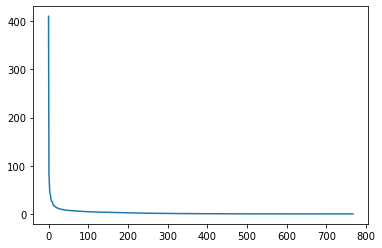

In [ ]:
U, s, Vt = la.svd(img_gray)
S = np.diag(s)
plt.plot(s)

The singular values of a matrix represent how 'important' a certain set of vectors is to forming the full matrix. We see here that only a very small number of vectors have large singular value.

In [ ]:
compressed - img_gray

array([[-0.03337409, -0.01228596, -0.00523279, ...,  0.04414527,
         0.02233754,  0.00442827],
       [ 0.04977385,  0.02359612, -0.00225346, ...,  0.03802613,
        -0.00440744, -0.03719871],
       [ 0.07351417,  0.03752713,  0.00143154, ...,  0.01625542,
        -0.03110882, -0.06355643],
       ...,
       [-0.00889682, -0.02939689, -0.05810291, ...,  0.02581837,
         0.03572826,  0.03736343],
       [-0.02119659, -0.05229507, -0.07889741, ...,  0.0325648 ,
         0.04283761,  0.0459514 ],
       [-0.03865214, -0.06705666, -0.0722408 , ...,  0.03056608,
         0.04075696,  0.04700619]])

(768,)


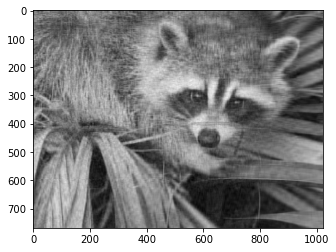

In [ ]:
print(s.shape) 
k = 40
compressed = U[:,:k] @ S[:k,:k] @ Vt[:k,:]
plt.imshow(compressed, cmap="gray")

In [ ]:
Vt[:k,:].shape

(10, 1024)

In [ ]:
U[:,:k].shape

(768, 10)

As we see, with only 10 vectors we are able to construct a (very blurry) representation of the image. In general, singular value decomposition can be very helpful for extracting generalities of a dataset.